

# Project: Investigate a Dataset (TMDB-Movies!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

in this project I have used pandas , numpy and matplotlib to explore this data set , viewing it and see if something that needs fixing and fix it before analyzing it and after that I came up with some questions wich

1-What is the (10) most vote average movies?

2-what is the relationship between movie budget and revenue ?

In [1]:
##import packages
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

in this section i will load data and clean it for analysis

### General Properties

In [2]:
# Load our data
df =pd.read_csv('tmdb-movies.csv')
print('succes to load data!')

succes to load data!


In [3]:
#output the first 7 rows of our data 
df.head(7)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08


In [4]:
#display shape of our data
rows_num = df.shape[0]
columns_num = df.shape[1]

print(f'number of rows = {rows_num}')
print(f'number of columns = {columns_num}')

number of rows = 10866
number of columns = 21


In [5]:
#display columns name 
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
#overview of our data
df.info

<bound method DataFrame.info of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4               

In [7]:
# overview for a general stats of our data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
#print the number of duplicated 
df.duplicated().sum()

1

In [9]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
#display the data_type for each column
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

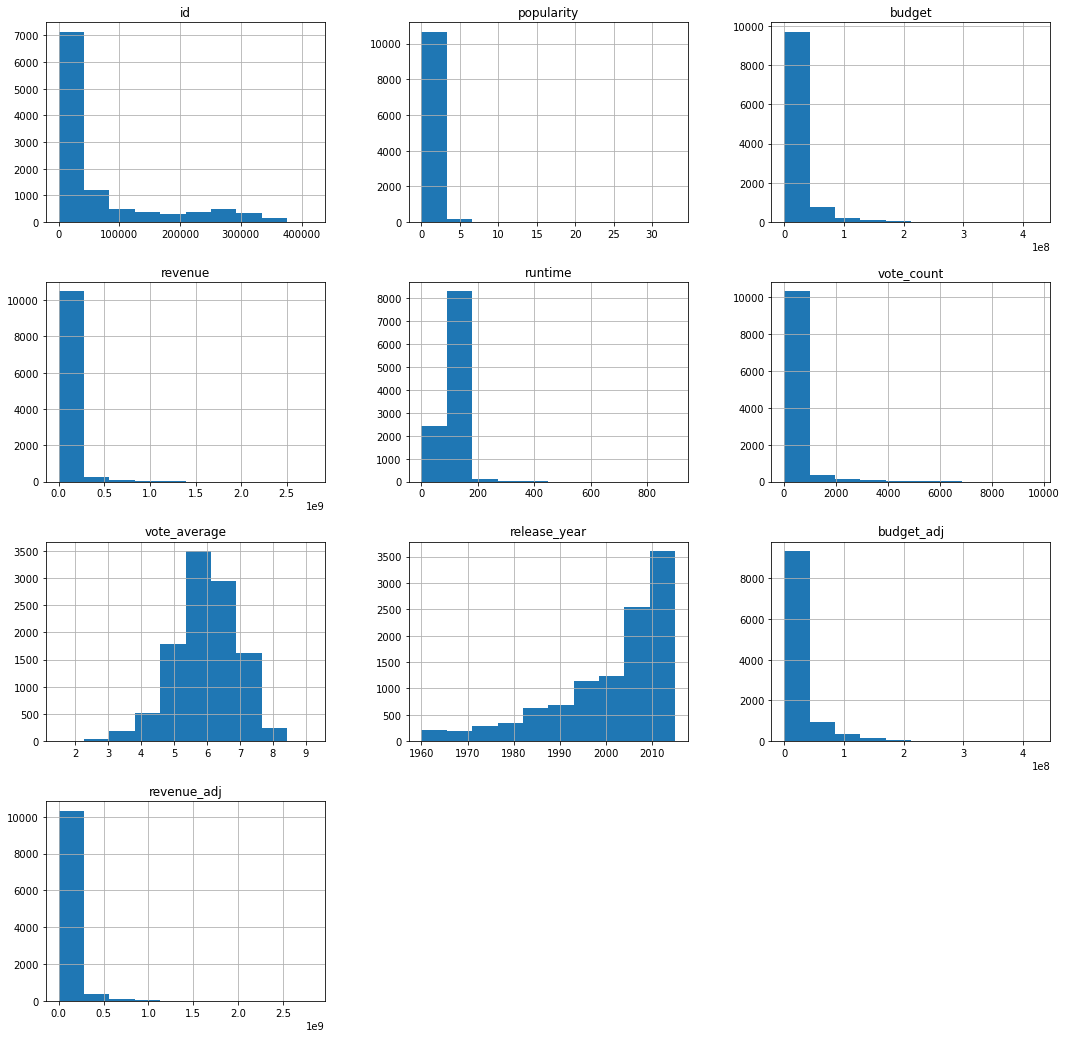

In [11]:
#graphs for our data
df.hist(figsize=(18,18));

### Data Cleaning (Replace this with more specific notes!)
i will drop some coulmns that are not necssary for me

In [12]:
# drop some unnecssary coulmns 
df=df.drop([ 'id', 'imdb_id', 'cast', 'homepage',  'tagline', 'production_companies', 'budget_adj', 'revenue_adj', 'keywords', 'overview'], axis=1)
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [13]:
# Delete the missing data
NaN_col = list()

def Check_NaN(column):
    NaN_sum = df[column].isnull().sum()
    if(NaN_sum > 700):
        NaN_col.append(column)
        print(f"Column '{column}' has {NaN_sum} Null values.")
    
for col in list(df.columns):
    Check_NaN(col)
df.drop(NaN_col, axis=1, inplace=True)

In [14]:
#drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [15]:
#repalcing the vales that have 0 in the data
mean_budget= df['budget'].mean()
df['budget'].replace(0, mean_budget, inplace = True)

In [16]:
#repalcing the vales that have 0 in the data
df['revenue'].replace(0, df['revenue'].mean(), inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis

in this section i will ask two questions :

*What is the (10) most vote average movies?

*what is the relationship between movie budget and revenue ?

### Research Question 1 (what is the relationship between movie budget and revenue ?)

In [1]:
#visualize the relation  ship between budgets and revenues
#choose the style "ggplot" to the figure
#calculate the mean of the budget and revenue by the release_year
budgets = df.groupby('release_year').mean()['budget']
revenues = df.groupby('release_year').mean()['revenue']

NameError: name 'df' is not defined

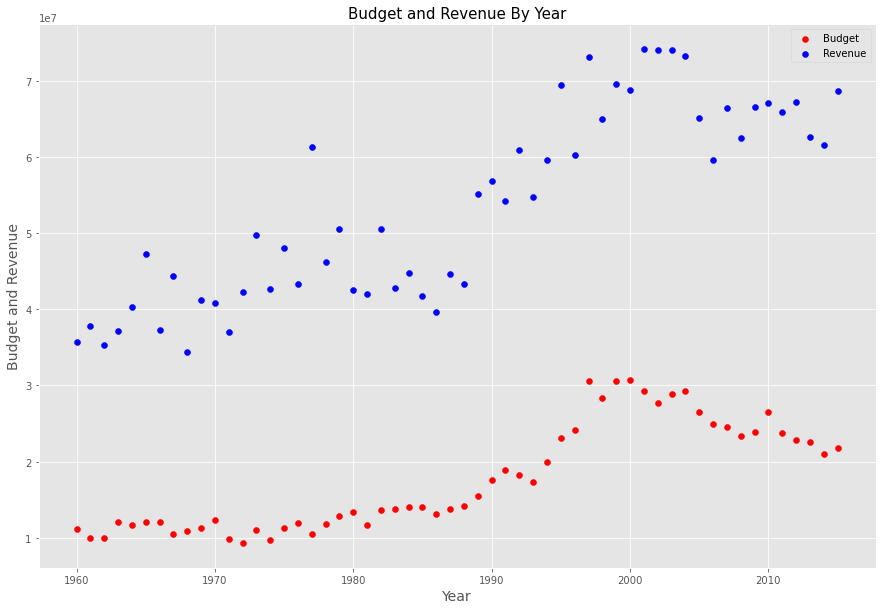

In [18]:
# figure size
plt.style.use("ggplot")
plt.figure(figsize=(15,10))
# give title and names to x , y axis 
plt.scatter(budgets.index, budgets, color='red', label = 'Budget')
plt.scatter(revenues.index, revenues, color='blue', label = 'Revenue')
plt.title('Budget and Revenue By Year' , fontsize = 15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Budget and Revenue', fontsize=14)
# display the graph
plt.legend()
plt.show()

### Research Question 2  (What is the revenue of the 10 most popular movies ?)

In [19]:
# making a seperate data frame for the popular movies 
pop_movies = df[['original_title' , 'popularity','revenue']]
pop_movies.sort_values(by='popularity', inplace=True, ascending=False)
most_pop = pop_movies.head(10)
pop_movies.head(10)


C:\Users\osama\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,original_title,popularity,revenue
0,Jurassic World,32.985763,1.513529e+09
1,Mad Max: Fury Road,28.419936,3.784364e+08
629,Interstellar,24.949134,6.217525e+08
630,Guardians of the Galaxy,14.311205,7.733124e+08
2,Insurgent,13.112507,2.952382e+08
631,Captain America: The Winter Soldier,12.971027,7.147666e+08
1329,Star Wars,12.037933,7.753980e+08
632,John Wick,11.422751,7.873990e+07
3,Star Wars: The Force Awakens,11.173104,2.068178e+09
633,The Hunger Games: Mockingjay - Part 1,10.739009,7.521002e+08


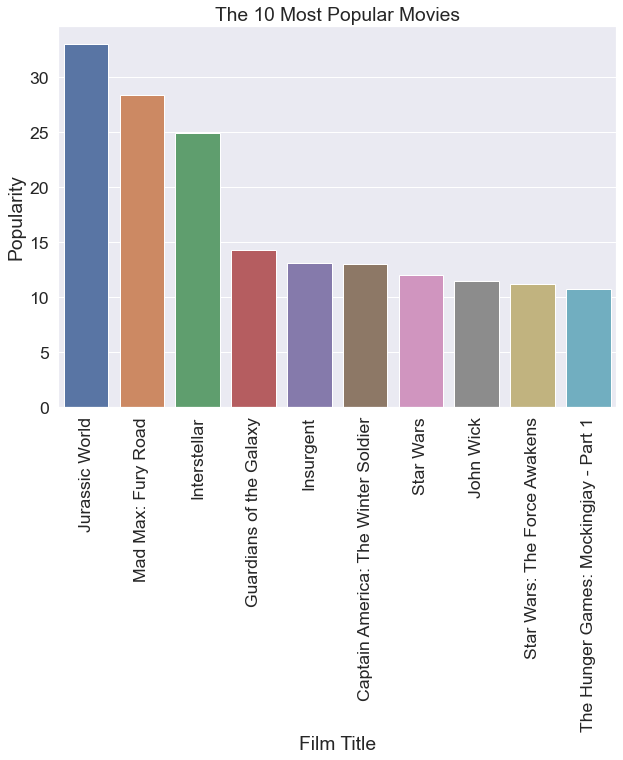

In [20]:
#determining the figure size
sns.set(rc={'figure.figsize':(10,7)} , font_scale = 1.6)


graph1 = sns.barplot(
    x=most_pop.original_title,
    y=most_pop.popularity)

graph1.tick_params(axis='x', rotation=90)

# Displaing the graph
graph1.set(xlabel='Film Title', ylabel='Popularity', title = 'The 10 Most Popular Movies')
plt.show()

<a id='conclusions'></a>
## Conclusions

 . we have learned the top 10 most average movies and also see the relationship between the budget and the revenue by the yea
 
 . Income from movies are increasing enormously year by year.
 
 . we can reduce the budget and we will get income also 
 
 .  we notice in the graph that shows us " the relationship between movie budget and revenue " that movies revenue in "blue" must be greater than movies budget in "red"
  

## limitations

* There is no data after 2015

* There is lots of missed data in runtime column

* I want to ask another question and i have a missed in data

* the missing data may have affected the analyss of the data